In [1]:
conda install -c conda-forge mlxtend


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
from mlxtend.preprocessing import TransactionEncoder

In [4]:
data=pd.read_csv("mymovies.csv")
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
data.shape

(10, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


## Considering only the transcation, i.e the textual transcations.

In [7]:
## Imputation to convert the nan values to 0's 
data.iloc[:,2:5]=data.iloc[:,2:5].apply(lambda x:x.fillna(0))

In [8]:
data.iloc[:,2:5]

,V3,V4,V5
0,Harry Potter1,Green Mile,LOTR2
1,Braveheart,0,0
2,0,0,0
3,Sixth Sense,0,0
4,Sixth Sense,0,0
5,Sixth Sense,0,0
6,0,0,0
7,0,0,0
8,Sixth Sense,0,0
9,Gladiator,Green Mile,0


In [9]:
data1=pd.get_dummies(data[['V1','V2','V3','V4','V5']])
data1.head()

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0


In [10]:
#Creating model with dummies of NAN values
data1_dummies=data1.iloc[:,[9,14,16]]
data1_dummies

,V3_0,V4_0,V5_0
0,0,0,0
1,0,1,1
2,1,1,1
3,0,1,1
4,0,1,1
5,0,1,1
6,1,1,1
7,1,1,1
8,0,1,1
9,0,0,1


# Apriori Algorithm

In [11]:
frequent_items=apriori(data1_dummies,min_support=0.005,max_len=2,use_colnames=True)
frequent_items

,support,itemsets
0,0.3,(V3_0)
1,0.8,(V4_0)
2,0.9,(V5_0)
3,0.3,"(V3_0, V4_0)"
4,0.3,"(V3_0, V5_0)"
5,0.8,"(V5_0, V4_0)"


In [12]:
frequent_items.sort_values('support',ascending=False,inplace=True)

## Building rules

In [13]:
rules_dummies=association_rules(frequent_items,metric='lift',min_threshold=1)
rules_dummies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V5_0),(V4_0),0.9,0.8,0.8,0.888889,1.111111,0.08,1.80
1,(V4_0),(V5_0),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
2,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
3,(V4_0),(V3_0),0.8,0.3,0.3,0.375000,1.250000,0.06,1.12
4,(V3_0),(V5_0),0.3,0.9,0.3,1.000000,1.111111,0.03,inf
5,(V5_0),(V3_0),0.9,0.3,0.3,0.333333,1.111111,0.03,1.05


In [14]:
rules_dummies.sort_values('lift',ascending=False,inplace=True)

In [15]:
#To eliminate redudancy in rules
def to_list(i):
    return(sorted(i))

rules_add=rules_dummies.antecedents.apply(to_list)+rules_dummies.consequents.apply(to_list)
rules_add=rules_add.apply(sorted)
rules_set=list(rules_add)

In [16]:
rules_set

[['V3_0', 'V4_0'],
 ['V3_0', 'V4_0'],
 ['V4_0', 'V5_0'],
 ['V4_0', 'V5_0'],
 ['V3_0', 'V5_0'],
 ['V3_0', 'V5_0']]

In [17]:
unique_rules=[list(m) for m in set(tuple(i)for i in rules_set)]
index_rules=[]
for i in unique_rules:
    index_rules.append(rules_set.index(i))

In [18]:
#rules without redudancy
rules_without_redud=rules_dummies.iloc[index_rules,:]
rules_without_redud

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V5_0),(V4_0),0.9,0.8,0.8,0.888889,1.111111,0.08,1.8
2,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
4,(V3_0),(V5_0),0.3,0.9,0.3,1.000000,1.111111,0.03,inf


In [19]:
#Sorting
rules_without_redud.sort_values('lift',ascending=False,inplace=True)

In [20]:
# Support and confidence
Support=rules_without_redud['support']
Support

2    0.3
0    0.8
4    0.3
Name: support, dtype: float64

In [21]:
confidence=rules_without_redud['confidence']
confidence

2    1.000000
0    0.888889
4    1.000000
Name: confidence, dtype: float64

Text(0, 0.5, 'Confidence')

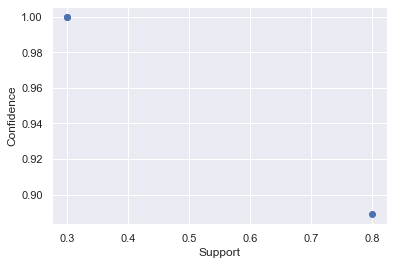

In [22]:
plt.scatter(Support,confidence);plt.xlabel("Support");plt.ylabel("Confidence")

In [23]:
#Model with other than zero values5
data1_without_dum=data1.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,15,17]]
data1_without_dum

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [24]:
#Applying apriori with support =0.005 and max length =2
frequents_item1=apriori(data1_without_dum,min_support=0.005,max_len=2,use_colnames=True)
frequents_item1

,support,itemsets
0,0.6,(V1_Gladiator)
1,0.1,(V1_Harry Potter1)
2,0.1,(V1_LOTR1)
3,0.2,(V1_Sixth Sense)
4,0.1,(V2_Harry Potter2)
5,0.1,(V2_LOTR)
6,0.1,(V2_LOTR1)
7,0.1,(V2_LOTR2)
8,0.6,(V2_Patriot)
9,0.1,(V3_Braveheart)


In [25]:
frequents_item1.sort_values('support',ascending=False,inplace=True)

In [26]:
#Building rules with minimum threshold=1
rules_without=association_rules(frequents_item1,metric='lift',min_threshold=1)
rules_without

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,(V3_Sixth Sense),(V1_Gladiator),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(V1_Gladiator),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.80
4,(V2_Patriot),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.80
5,(V3_Sixth Sense),(V2_Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
6,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(V1_Sixth Sense),(V5_LOTR2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
9,(V5_LOTR2),(V1_Sixth Sense),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [27]:
rules_without.sort_values('lift',ascending=False,inplace=True)

In [28]:
#Eliminate the redudancy
def to_list_out(i):
    return(sorted(i))

rules_out_add=rules_without.antecedents.apply(to_list_out)+rules_without.consequents.apply(to_list_out)

In [29]:
rules_out_add

10                 [V3_Gladiator, V2_LOTR]
29            [V5_LOTR2, V3_Harry Potter1]
38                    [V1_LOTR1, V2_LOTR2]
17            [V2_LOTR1, V3_Harry Potter1]
16            [V3_Harry Potter1, V2_LOTR1]
11                 [V2_LOTR, V3_Gladiator]
21                    [V2_LOTR1, V5_LOTR2]
28            [V3_Harry Potter1, V5_LOTR2]
20                    [V5_LOTR2, V2_LOTR1]
39                    [V2_LOTR2, V1_LOTR1]
32    [V1_Harry Potter1, V2_Harry Potter2]
33    [V2_Harry Potter2, V1_Harry Potter1]
30      [V3_Harry Potter1, V1_Sixth Sense]
31      [V1_Sixth Sense, V3_Harry Potter1]
27       [V4_Green Mile, V3_Harry Potter1]
26       [V3_Harry Potter1, V4_Green Mile]
25           [V4_Green Mile, V3_Gladiator]
24           [V3_Gladiator, V4_Green Mile]
37               [V2_LOTR, V1_Sixth Sense]
34              [V1_Sixth Sense, V2_LOTR1]
43               [V5_LOTR2, V4_Green Mile]
18          [V3_Gladiator, V1_Sixth Sense]
19          [V1_Sixth Sense, V3_Gladiator]
36         

In [30]:
rules_out_add=rules_out_add.apply(sorted)
rules_set_out=list(rules_out_add)

In [31]:
rules_set_out

[['V2_LOTR', 'V3_Gladiator'],
 ['V3_Harry Potter1', 'V5_LOTR2'],
 ['V1_LOTR1', 'V2_LOTR2'],
 ['V2_LOTR1', 'V3_Harry Potter1'],
 ['V2_LOTR1', 'V3_Harry Potter1'],
 ['V2_LOTR', 'V3_Gladiator'],
 ['V2_LOTR1', 'V5_LOTR2'],
 ['V3_Harry Potter1', 'V5_LOTR2'],
 ['V2_LOTR1', 'V5_LOTR2'],
 ['V1_LOTR1', 'V2_LOTR2'],
 ['V1_Harry Potter1', 'V2_Harry Potter2'],
 ['V1_Harry Potter1', 'V2_Harry Potter2'],
 ['V1_Sixth Sense', 'V3_Harry Potter1'],
 ['V1_Sixth Sense', 'V3_Harry Potter1'],
 ['V3_Harry Potter1', 'V4_Green Mile'],
 ['V3_Harry Potter1', 'V4_Green Mile'],
 ['V3_Gladiator', 'V4_Green Mile'],
 ['V3_Gladiator', 'V4_Green Mile'],
 ['V1_Sixth Sense', 'V2_LOTR'],
 ['V1_Sixth Sense', 'V2_LOTR1'],
 ['V4_Green Mile', 'V5_LOTR2'],
 ['V1_Sixth Sense', 'V3_Gladiator'],
 ['V1_Sixth Sense', 'V3_Gladiator'],
 ['V1_Sixth Sense', 'V2_LOTR'],
 ['V2_LOTR1', 'V4_Green Mile'],
 ['V2_LOTR1', 'V4_Green Mile'],
 ['V2_LOTR', 'V4_Green Mile'],
 ['V2_LOTR', 'V4_Green Mile'],
 ['V1_Sixth Sense', 'V5_LOTR2'],
 ['V1_Sixt

In [32]:
#unique values
unique_values_out=[list(n) for n in set(tuple(i) for i in rules_set_out)]
index_rules_out=[]
for i in unique_values_out:
    index_rules_out.append(rules_set_out.index(i))

In [33]:
## Rules without redundancy
rules_without_out=rules_without.iloc[index_rules_out,:]

In [34]:
# Sorting
rules_without_out.sort_values('lift',ascending=False,inplace=True)

In [35]:
Support_out=rules_without_out["support"]
Confidence_out=rules_without_out["confidence"]
lift=rules_without_out["lift"]

In [36]:
# Plotting 3D plot for support, confidence and lift
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'lift')

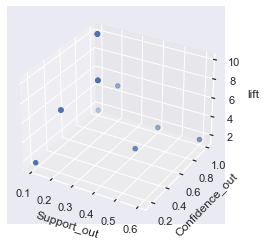

In [37]:
fig=plt.figure()
axis=fig.add_subplot(111,projection="3d")
axis.scatter(Support_out,Confidence_out,lift)
axis.set_xlabel("Support_out")
axis.set_ylabel("Confidence_out")
axis.set_zlabel("lift")

In [38]:
import scipy as sp

Text(0, 0.5, 'Confidence')

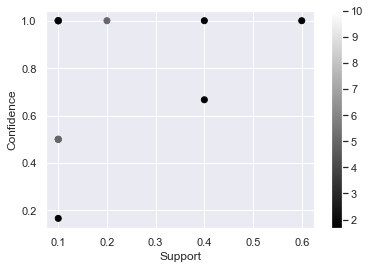

In [39]:
plt.scatter(Support_out,Confidence_out,c=lift,cmap='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("Confidence")

In [40]:
#Creating the model with the dummy variables given in the data set itself
data1_dummies=data.iloc[:,5:]

In [41]:
data1_dummies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [42]:
#Applying apriori with support -0.005, max length=2
frequent_ori=apriori(data1_dummies,min_support=0.005,max_len=2,use_colnames=True)
frequent_ori.sort_values('support',ascending=False,inplace=True)

In [43]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
data1_dummies=data1_dummies.applymap(encode_units)
frequent_itemsets=apriori(data1_dummies,min_support=0.001, use_colnames=True)

In [44]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)

In [45]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(LOTR2),"(LOTR1, Harry Potter1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [46]:
## Building rules with lift and minimum threshold =1
rules_ori=association_rules(frequent_ori,metric='lift',min_threshold=1)
rules_ori.sort_values('lift',ascending=False,inplace=True)

In [50]:
## Eliminating the redundancy
def to_list_ori(i):
    return(sorted(i))

ori_add=rules_ori.antecedents.apply(to_list_ori)+rules_ori.consequents.apply(to_list_ori)
ori_add=ori_add.apply(sorted)
ori_set=list(ori_add)
unique_ori=[list(m) for m in set(tuple(i) for i in ori_set)]

index_ori=[]
for i in unique_ori:
    index_ori.append(ori_set.index(i))